___
# Ciência dos Dados - PROJETO 1

## Samuel Granato
___

## Acesso à internet em diferentes regiões do Brasil e a relação com o socio-econômico

___
## Introdução

O acesso à internet pode variar em diferentes regiões do Brasil, mesmo que não seja influenciada pela renda, mas sim pela cultura?

___
## Análise e Resultados

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

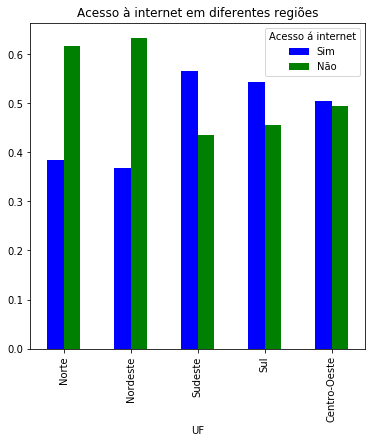

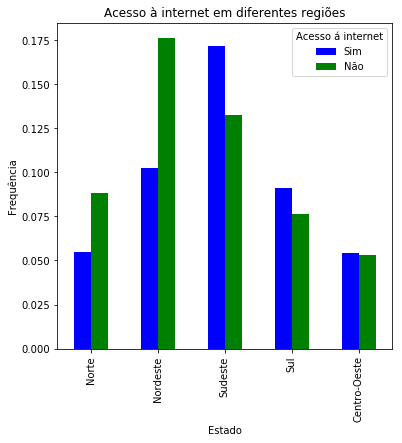

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 16 09:23:16 2017

@author: Samuel
"""

import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_table("DOM2013.csv", encoding="windows-1252", sep=",")
pd.options.mode.chained_assignment = None

#dados.UF=dados.UF.astype("category")
#dados.UF.cat.categories = ("Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
dados.V02322 =dados.V02322 .astype("category")
dados.V02322.cat.categories = ("Sim","Não")
dados.dropna()["UF"]

pd.to_numeric(dados.UF)
dados.UF[(dados.UF>10) & (dados.UF<20)] = [10]
dados.UF[(dados.UF>20) & (dados.UF<30)] = [20]
dados.UF[(dados.UF>30) & (dados.UF<40)] = [30]
dados.UF[(dados.UF>40) & (dados.UF<50)] = [40]
dados.UF[(dados.UF>50)] = [50]

dados.UF =dados.UF.astype("category")
dados.UF.cat.categories = ("Norte","Nordeste","Sudeste","Sul","Centro-Oeste")

crosstable=pd.crosstab(dados.UF,dados.V02322,rownames=['UF'],normalize='index', colnames=['Acesso á internet'])
crosstable2=pd.crosstab(dados.UF,dados.V02322,rownames=['UF'],normalize='all', colnames=['Acesso á internet'])
plot = crosstable.plot(kind='bar',title='Acesso à internet em diferentes regiões',figsize=(6, 6),color=('b','g'))
plot = crosstable2.plot(kind='bar',title='Acesso à internet em diferentes regiões',figsize=(6, 6),color=('b','g'))
plt.ylabel('Frequência')
plt.xlabel('Estado')
plt.show()


In [ ]:
O acesso à internet é menor nas regiões norte e nordeste

___
## Conclusão 

Descreva aqui suas conclusões!

In [ ]:
O acesso 